In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


# Load the Dataset

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



# Length of the Dataset

print("Length of Train Images :",len(train_images))
print("Length of Test Images :",len(test_images))
print("Length of Train Labels :",len(train_labels))
print("Length of Test Labels :",len(test_labels))


# Shape of the Dataset

print("\nShape of Train Images :",train_images.shape)
print("Shape of Test Images :",test_images.shape)
print("Shape of Train Labels :",train_labels.shape)
print("Shape of Test Labels :",test_labels.shape)



Length of Train Images : 60000
Length of Test Images : 10000
Length of Train Labels : 60000
Length of Test Labels : 10000

Shape of Train Images : (60000, 28, 28)
Shape of Test Images : (10000, 28, 28)
Shape of Train Labels : (60000,)
Shape of Test Labels : (10000,)


Value : 9




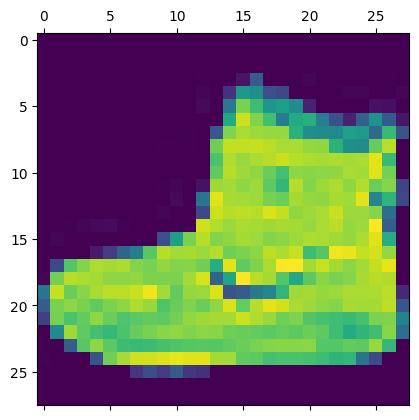

In [13]:
# To view the Data

print("Value :", train_labels[0])

print("\n")

plt.matshow(train_images[0])
plt.show()


In [11]:
# Scale the Train & test Images

train_images = train_images / 255
test_images = test_images / 255


In [15]:
# Create a Neural Network

model = keras.Sequential([

    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")

])



# Compile

model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])



# Train

model.fit(train_images, train_labels, epochs=5)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7848 - loss: 0.6272
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8617 - loss: 0.3855
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8766 - loss: 0.3363
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8853 - loss: 0.3115
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8925 - loss: 0.2915


In [16]:
# Evaluate the Train & Test data

EV1 = model.evaluate(train_images, train_labels)
print("Evaluation on Train dataset :", EV1)

print("\n")

EV2 = model.evaluate(test_images, test_labels)
print("Evaluation on Test dataset :", EV2)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8999 - loss: 0.2699
Evaluation on Train dataset : [0.2721722424030304, 0.8999000191688538]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8787 - loss: 0.3417
Evaluation on Test dataset : [0.349543958902359, 0.8748000264167786]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted Label Index : 1




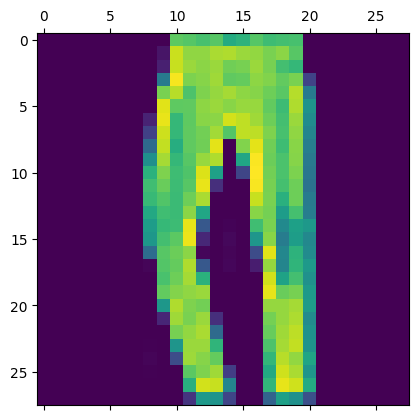



Predicted Label : Trouser


In [20]:
# Predict the Data

y_pred = model.predict(test_images)
print("Predicted Label Index :", np.argmax(y_pred[5]))

print("\n")

plt.matshow(test_images[5])
plt.show()

print("\n")



# Labels

class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

print("Predicted Label :", class_labels[np.argmax(y_pred[5])])


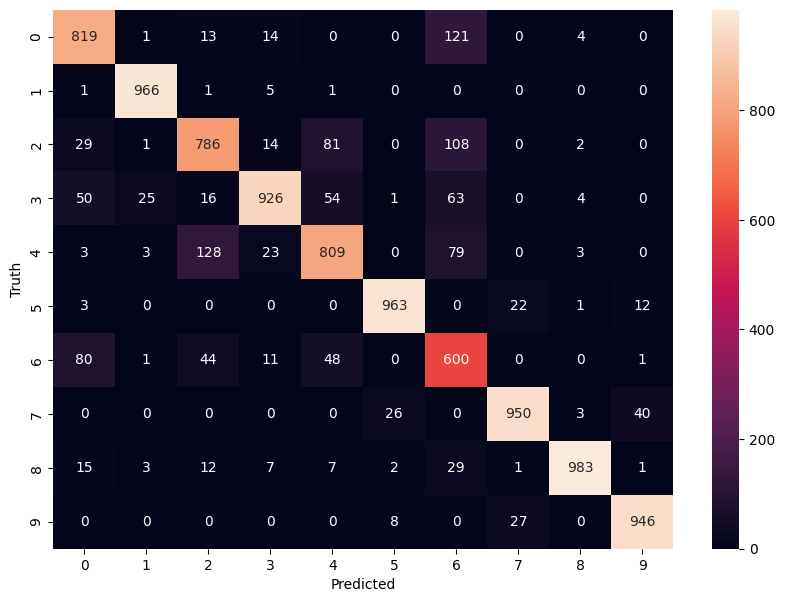

In [21]:
import seaborn as sn


# Plot

y = [np.argmax(i) for i in y_pred]


# Confusion Matrix

CM = tf.math.confusion_matrix(y, test_labels)


plt.figure(figsize = (10,7))
sn.heatmap(CM, annot = True, fmt = "d")
plt.xlabel("Predicted")
plt.ylabel("Truth")

plt.show()
